# Lesson 12
# Execution Control with Loops

Loops are a fundamental construct of execution control. Loops are a way of controlling repetition of code, i.e.,
allow the same piece of code to run multiple times. 

Two repetion structures in Python are `for` loops and `while` loops. 

`for` loops run a set number of times.  In a typical application, a block of code needs to be applied to the elements of a list or an array or list one at a time.    The number of repetitions of the code is determined in advance. 

`while` loops run as long as a specific logical condition is true. The key difference between `while` and `for` loops is that *the number of repetitions in a while loop is unknown* 

While loops make it easy to make code blocks repeat, they are **very slow to execute**  

In [1]:
import numpy as np 
from numpy import random
from matplotlib import pyplot as plt
#Lets start the random number generator
rng = random.default_rng(seed = 9876)


## While Loops

A `while` loop is a type of loop that runs as long as a *logical condition* is **True**. When the logical condition becomes **False**, the loop stops running. The general form of a while loop in Python is below:

    while logical_statement: 
        do this
        and that
        and that 
        AND DO SOMETHING THAT POSSIBLY CHANGES THE STATE OF THE LOGICAL STATEMENT



### Example 1: while condition is true

In [2]:
i = 0   #since i is in the logical statement, it must be set to an initial value 
while i<4:  # this is the conditional statement which controls execution
    print(i)
    i = i+1 #this is a critical line, as it updates the value of i


0
1
2
3


### There are three critical pieces to the while loop.  
* First, the variable(s) that will be used in the logical statement must be initialized to some value.  
* Second, a while statement performs execution control based on a logical statement being true.  
* Third, inside the while loop, the variable(s) used in the logical statement must be updated to new values 

### CRITICAL STEP IN WHILE LOOPS

When making use of a `while` loop it is critical that there always be a line inside the while loop that updates whatever is being tested by the logical statement. 

If that line is missing, the while loop will become an **infinite** loop and the code will only stop by an act of ***VIOLENCE*** by you against either your jupyter notebook server, or in a worst case, against your computer (hard reboot).  

### Example 2 while a flag stays True

Sometimes, its easy to just use a Boolean Indicator variable to control the while loop. 

This can be useful if the conditions that end the while loop are complex. 

Here I rewrite the loop above with an indicator variable. 

In [3]:
i = 0
keep_looping = True
while keep_looping:
    print(i)
    i = i+1
    if i >= 4:
        keep_looping = False


0
1
2
3


### Example 3.  When will I have a thousand dollars? 

Suppose you have 100 dollars.  You put in the bank, and each year they give you 2.5% interest (compounded annually).  How many years will it take for you to have more than 1000 dollars. 

Disclaimer: I am fully aware of the compound interest formula.  Just bear with me here.  

In [5]:
baseline = 100 
interest = 0.04
target = 1000
balance = baseline
years = 0 
while balance <= target:
    balance = balance + interest*balance #this is what happens on Dec 31!
    years = years + 1 
print('Balance is', balance)    
print('Number of years is ', years)    

Balance is 1011.5026353896955
Number of years is  59


What is the answer to the question? In terms of the code? 

years! 

### Example 4.  When will $2^x$ be greater than 1000?

This example shows a classical type of problem we might solve with a while loop.


In [1]:
limit = 1000  #set the limit 
power = 0  #start at 0
while (2**power) < limit:
    power = power + 1

print('power =',power)
print('Value =',2**power)


power = 10
Value = 1024


When will the value become 10,000? Try it by changing the code above.

### Exercise 1: When will the population reach 10,000 tribbles?

A tribble (Star Trek) looks really cute but they multiply fast and have long lives. Each tribble has 2 babies in it's lifetime. Not bad? But as soon as the baby is born it will have 2 babies each. 

When will a single tribble lead to a population of 10000? 

How many generations of tribbles will there be all together?

A new tribble has it's babbies within 5 mins of its birth. How long before the population is 10,000?

## For Loop 

A `for` loop is a repetition structure where a code block runs a specified number of times.

    for var in therange:
        do this
        and this 
        and this 
    
therange can be given in many forms.  The most common way is the `range` command, but it can also be a **list** or a numpy **array** or even a **string**.

The most important difference between a for loop and while loop is that a for loop **automatically increments the value of var to the next element in therange** in each repetition of the code block

As we will see in the examples below var is often used as an index variable that indexes into arrays sequentially. 

### Example 5  Using the Range Function

In [16]:
for i in range(3):
    print(i)

0
1
2


### Range function 

Python's `range` function can be customized by supplying up to three arguments. The general format of the range function is below:

    range(start,stop,step)
    
*start*, *stop*, *step* must be **integers**


In [17]:
print(range(0,6,2))

range(0, 6, 2)


In [21]:
list(range(0,6,2))

[0, 2, 4]

In [22]:
for i in range(0,6,2):
    print(i)

0
2
4


Can I use numpy's arange? 

In [23]:
for i in np.arange(0,6,2):
    print(i)

0
2
4


Keep this in mind if you need to step in fractions. But usually we will work with range.  

In [24]:
for i in np.arange(0,2,0.25):
    print(i)

0.0
0.25
0.5
0.75
1.0
1.25
1.5
1.75


### Example 6 Projecting your bank account in 5 years 

Suppose you have $500 in your bank account and interest rate is 6.0\% compounded annually. Write a for loop that will compute how much you will have in 5 years. 

In [27]:
n = 5 # number of years
interest = 0.06 # interest rate 
balance = 500 # starting balance
for year in range(n):
    balance = balance+interest*balance
print('Balance of ', balance, 'after ', n, 'years')
    

Balance of  669.1127887999999 after  5 years


What if interest rate varies over the five years? So that the interest rate for each of the five years is is [6\%, 5\%,4\%,4\%,5\%]

In [29]:
#n = 5 # number of years
interest = np.array([0.06,0.05,0.04,0.04,0.05]) # interest rate 
n = len(interest) # I determined the number of years from the lenght of int
balance = 500 # starting balance
for year in range(n):
    print(interest[year])
    balance = balance+interest[year]*balance #notice that I use year here as an index into int
print('Balance of ', balance, 'after ', n, 'years')
    

0.06
0.05
0.04
0.04
0.05
Balance of  632.00592 after  5 years


What if I want to keep track of what is happening to my balance each year and make a graph? 

Balance of  1603.5677361064218 after  20 years


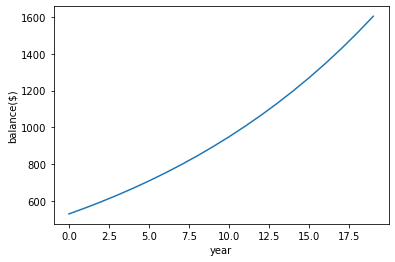

In [32]:
n = 20 # number of years
interest = 0.06 # interest rate 
balance = 500 # starting balance
balance_by_year = np.zeros(n)
for year in range(n):
    balance = balance+interest*balance
    balance_by_year[year] = balance #Here I use year as an index into the output array 
print('Balance of ', balance, 'after ', n, 'years')

plt.plot(range(n),balance_by_year)
plt.xlabel('year')
plt.ylabel('balance($)')
plt.show()

In [33]:
balance_by_year[0]

530.0

The first value in the graph right now is NOT the starting balance.  Can I rewrite the code to include that? 

Balance of  1603.5677361064218 after  20 years


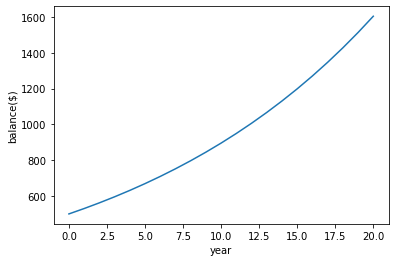

In [35]:
n = 20 # number of years
interest = 0.06 # interest rate 
balance = 500 # starting balance
balance_by_year = np.zeros(n + 1) #notice I added 1 more here. 
balance_by_year[0] = balance # set the first value to the starting balance
for year in range(n):
    balance = balance+interest*balance
    balance_by_year[year + 1] = balance #Here I make the index year + 1. This is because i am using 0 for the starting balance
print('Balance of ', balance, 'after ', n, 'years')

plt.plot(range(n+1),balance_by_year)
plt.xlabel('year')
plt.ylabel('balance($)')
plt.show()

### Example 7  Grade book

In an earlier example we looked at the grades of each person as an array. Now let us look at a grade book given below. Find out the Average of each student. 


![title](https://www.internet4classrooms.com/excel_grade_1.gif)

In [9]:
import numpy as np

grade_book = np.array([[89, 78, 100, 88, 92, 100, 95, 78, 88], 
                       [68, 87, 72, 60, 80, 65, 100, 50, 42], 
                       [98, 87, 100, 78, 99, 80, 100, 88, 95], 
                       [78, 68,92, 88, 76, 95, 99, 88, 72], 
                       [89, 78, 100, 88, 92, 100, 95, 78, 88], 
                       [79, 69, 97, 95, 82, 99, 93, 75, 78],
                       [98, 87, 100, 78, 99, 80, 100, 88, 95],
                       [78, 68, 92, 88, 76, 95, 99, 88, 72],
                       [89, 78, 100, 88, 92, 100, 95, 78, 88],
                       [89, 78, 100, 88, 92, 100, 95, 78, 88],
                       [79, 69, 97, 95, 82, 99, 93, 75, 78]])
students = ['Ann', 'Bill', 'Carol', 'Doug', 'Elaine', 'Frank', 'Gloria', 'Howard', 'Imogene','John', 'Kesha']
print (grade_book)

[[ 89  78 100  88  92 100  95  78  88]
 [ 68  87  72  60  80  65 100  50  42]
 [ 98  87 100  78  99  80 100  88  95]
 [ 78  68  92  88  76  95  99  88  72]
 [ 89  78 100  88  92 100  95  78  88]
 [ 79  69  97  95  82  99  93  75  78]
 [ 98  87 100  78  99  80 100  88  95]
 [ 78  68  92  88  76  95  99  88  72]
 [ 89  78 100  88  92 100  95  78  88]
 [ 89  78 100  88  92 100  95  78  88]
 [ 79  69  97  95  82  99  93  75  78]]


In [10]:
student_average = np.zeros((11,1))
print (student_average)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [12]:
for student_id in range(11): #loop over the rows
    test_avg = (grade_book[student_id, 0] + grade_book[student_id, 1] + grade_book[student_id, 2])/3
    proj_avg = (grade_book[student_id, 3] + grade_book[student_id, 4])/2
    hmw_avg = (grade_book[student_id, 5] + grade_book[student_id,6] + grade_book[student_id,7] + grade_book[student_id,8])/4
    student_average [student_id, 0] = (test_avg*0.4) + (proj_avg*0.5) + (hmw_avg*0.1)
print(student_average)

[[89.625     ]
 [71.69166667]
 [91.325     ]
 [81.58333333]
 [89.625     ]
 [85.54166667]
 [91.325     ]
 [81.58333333]
 [89.625     ]
 [89.625     ]
 [85.54166667]]


### Exercise 2: What grade should they get on a test to get an A- in class?

There is one more test that has to be taken. What is the miniumum grade that each studtent should get so that they can still get atleast 90% in the class?

HINT: 

$ (\frac{T1+T2+T3+T4}{4})*0.4 + (proj\_avg)*0.5 + (hmw\_avg)*0.1 = 90$